In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Ecom = pd.read_csv("E-commerce Website Logs.csv")

C:\Users\PMLS\AppData\Local\Temp\ipykernel_15116\1955339450.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  Ecom = pd.read_csv("E-commerce Website Logs.csv")


# Exploring a Ecommerce website dataset and analysing it:

E-commerce, short for electronic commerce, refers to buying and selling goods or services over the internet. It encompasses online retail stores, digital marketplaces, and electronic payment systems.
The following dataseet is a data of an E-commerce store running worldwide. Meaningfull EDA is appliedd to the dataset to gain insights about the business.

In [3]:
Ecom

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.00,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.00,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.00,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.00,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.00,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172833,2017-03-16 11:42:01.298,4372,TCP,94.197.121.229,100600,Android App,NaN,Male,US,Normal,English,0.0000,Yes,143.36,Debit Card
172834,2017-03-16 12:10:17.340,2167,TCP,129.110.241.72,30400,Android App,NaN,Female,IT,Normal,English,15.1500,No,0.00,Cash
172835,2017-03-16 12:10:17.340,2725,TCP,185.119.252.121,100300,Android App,NaN,Female,IT,Normal,English,600.1600,No,0.00,Credit Card
172836,2017-03-16 15:52:58.342,3728,TCP,185.145.107.23,50200,Android App,NaN,Male,US,Normal,Russian,75.7500,No,0.00,Cash


In [4]:
#Checking for empty data:
Ecom.isnull().sum()

#only age is empty having 73381  empty values.

accessed_date           0
duration_(secs)         0
network_protocol        0
ip                      0
bytes                   0
accessed_Ffom           0
age                 73381
gender                  0
country                 0
membership              0
language                0
sales                   0
returned                0
returned_amount         0
pay_method              0
dtype: int64

In [5]:
Ecom.shape

(172838, 15)

In [6]:
Ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               99457 non-null   object 
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 19.8+ MB


In [7]:
a = Ecom["sales"].sum()
a

71096297.5163

In [8]:
b = Ecom["returned_amount"].sum()
b

12792102.021000002

In [9]:
#total sales 
a-b


58304195.495299995

# PAYMENT METHOD ANALYSIS:

Three payment methods are being used by the website: 
1) Cash  2) Credit Card   3)Debit card

In the EDA of e-commerce payment methods, cash transactions emerge as the primary driver of sales, likely due to their widespread acceptance and familiarity among consumers. However, credit card payments are associated with higher return rates, while debit cards exhibit lower returns, possibly reflecting different consumer spending behaviors and risk preferences.



In [10]:
#what payments methods where used and how often:

pay_meth = Ecom["pay_method"].value_counts()
pay_meth 

Cash           72670
Credit Card    53031
Debit Card     27497
Others         19640
Name: pay_method, dtype: int64

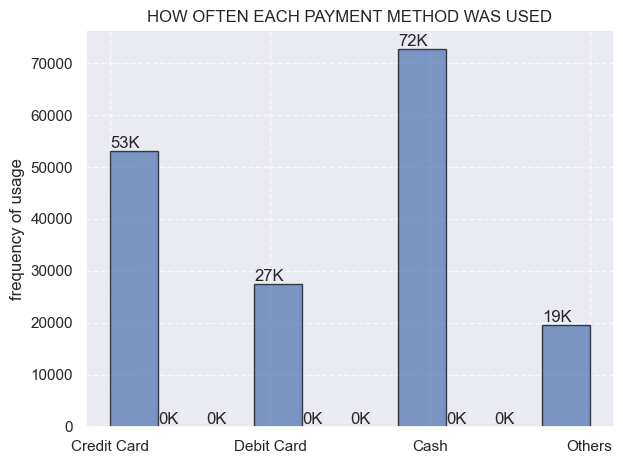

In [108]:


ax = plt.hist(Ecom["pay_method"],edgecolor='black', alpha=0.7)

plt.title("HOW OFTEN EACH PAYMENT METHOD WAS USED")
plt.ylabel("frequency of usage")

counts = ax[0]
for i, count in enumerate(counts):
    plt.text(ax[1][i], count , str(int(count/1000))+"K", ha='left', va='bottom')


plt.grid(True, linestyle='--', alpha=0.8)    

plt.tight_layout()

In [12]:
# amount of payments made using each payment method:

#through credit card:

credit = Ecom[Ecom["pay_method"]=="Credit Card"]
round(credit["sales"].sum(),2)


22083416.01

In [13]:
#Through Debit card:

Debit= Ecom[Ecom["pay_method"]=="Debit Card"]
round(Debit["sales"].sum(),2)



11209381.23

In [14]:
#Through cash:

Cash = Ecom[Ecom["pay_method"]=="Cash"]
Cash["sales"].sum()


29755299.0942

In [15]:
x = Ecom["pay_method"].unique()
y = Ecom["sales"].sum()

#plt.bar( Ecom["pay_method"],Ecom["sales"])

#plt.show()



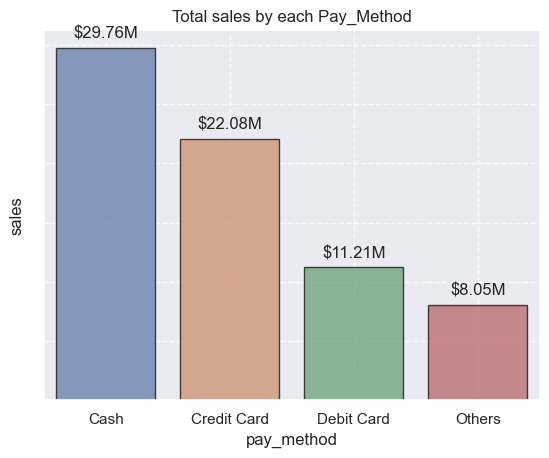

In [107]:
ax = sns.barplot(x="pay_method", y="sales", data=Ecom.groupby("pay_method").sum().reset_index(),edgecolor='black', alpha=0.7)


for p in ax.patches:
    rounded_height = round(p.get_height() / 1_000_000, 2)
    ax.annotate(f'${rounded_height}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Total sales by each Pay_Method")
ax.set_yticklabels([])

plt.grid(True, linestyle='--', alpha=0.8)



plt.show()

In [17]:
Ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               99457 non-null   object 
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 19.8+ MB


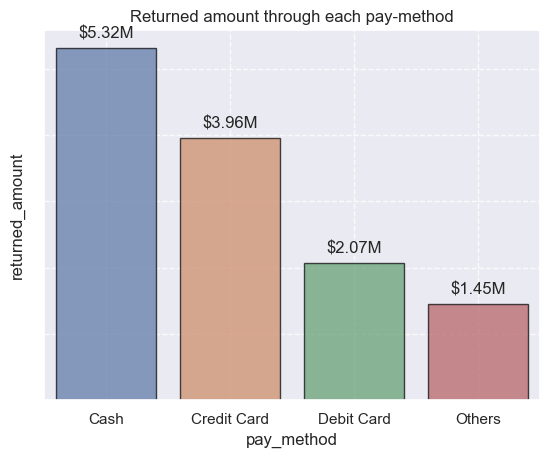

In [106]:
# Total returns by each pay_method

ax = sns.barplot(x="pay_method",y="returned_amount",data=Ecom.groupby("pay_method").sum().reset_index(),edgecolor='black', alpha=0.7)
plt.title("Returned amount through each pay-method")

ax.set_yticklabels([])
for p in ax.patches:
    rounded_height = round(p.get_height() / 1_000_000, 2)
    ax.annotate(f'${rounded_height}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.grid(True, linestyle='--', alpha=0.8)   
plt.show()

# PLATFORM ANALYSIS:


In platform analysis, the Android app and Chrome emerge as top performers in e-commerce. Their popularity could stem from user-friendly interfaces, wider compatibility, and seamless integration with online shopping experiences. Their dominance suggests a preference for mobile convenience and desktop browsing among consumers, driving higher engagement and transactions.

In [19]:
# what platforms where used and how often:

Ecom["accessed_Ffom"].value_counts()

Android App        38216
Chrome             28254
Mozilla Firefox    26592
Others             26592
IOS App            21606
Safari             16467
Microsoft Edge     14958
SafFRi               153
Name: accessed_Ffom, dtype: int64

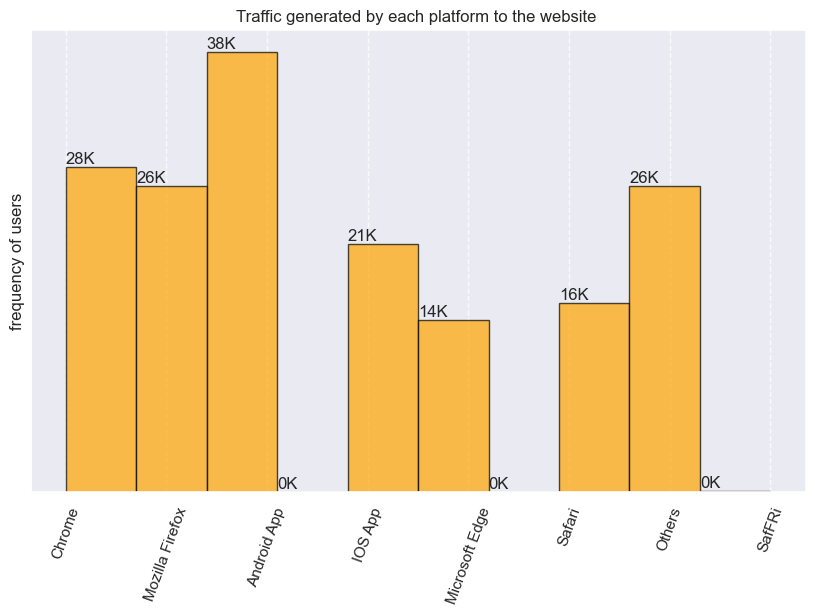

In [76]:
plt.figure(figsize=(10,6))
ax = plt.hist(Ecom["accessed_Ffom"],color="orange",edgecolor='black', alpha=0.7)
plt.xticks(rotation=70)

plt.yticks([])

plt.ylabel("frequency of users")

plt.title("Traffic generated by each platform to the website ")
counts = ax[0]
for i, count in enumerate(counts):
    plt.text(ax[1][i], count,str(round(int(count/1000),2))+"K", ha='left', va='bottom')
    


plt.grid(True, linestyle='--', alpha=0.8) 

plt.show()

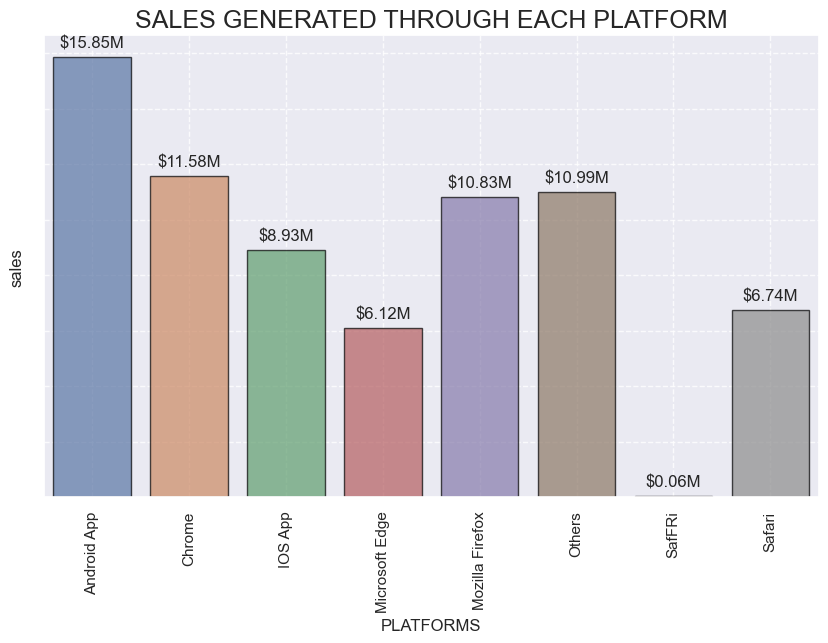

In [105]:
# sales made through each platform:

sns.set_theme()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="accessed_Ffom",y="sales",data=Ecom.groupby("accessed_Ffom").sum().reset_index(),edgecolor='black', alpha=0.7)
ax.set_yticklabels([])
plt.xticks(rotation=90)
plt.xlabel("PLATFORMS")

plt.title("SALES GENERATED THROUGH EACH PLATFORM", fontsize=18)

for p in ax.patches:
    rounded_height = round(p.get_height() / 1_000_000, 2)
    ax.annotate(f'${rounded_height}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.grid(True, linestyle='--', alpha=0.8)    
plt.show()

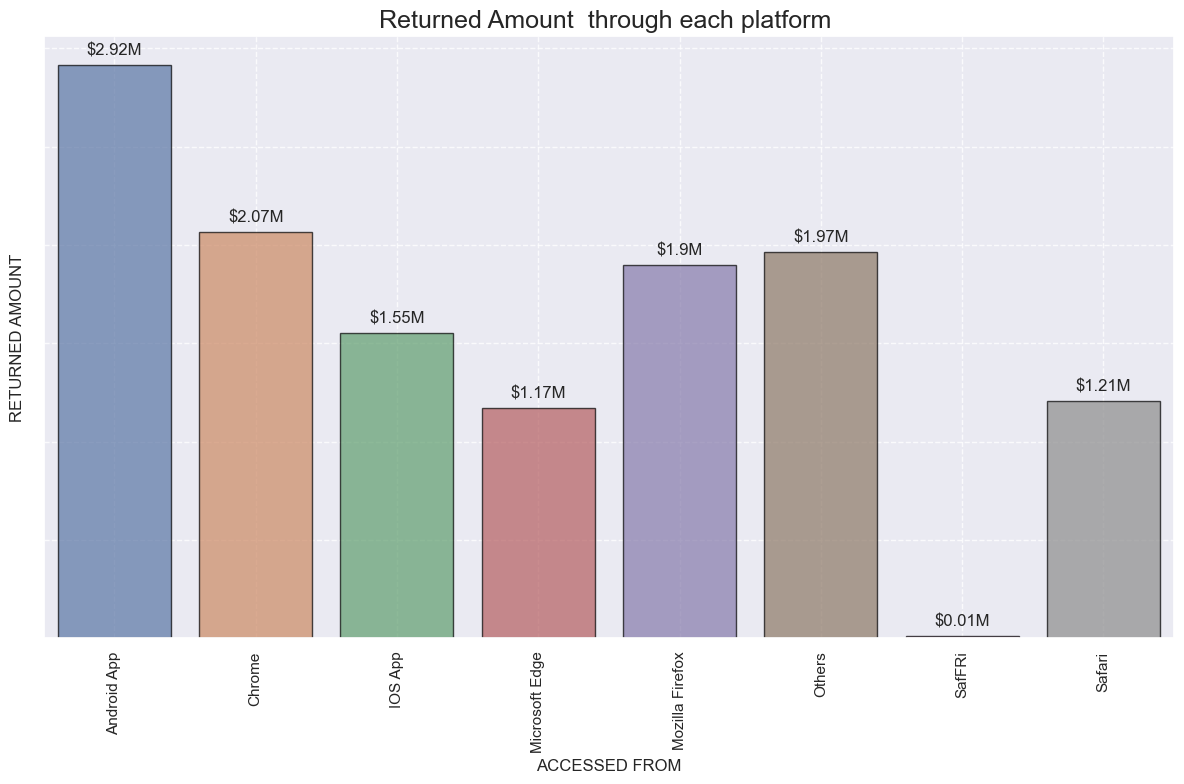

In [104]:
# Returns made through each platform:

sns.set_theme()
plt.figure(figsize=(12,8))
ax = sns.barplot(x="accessed_Ffom",y="returned_amount",data=Ecom.groupby("accessed_Ffom").sum().reset_index(),edgecolor='black', alpha=0.7)
plt.xticks(rotation = 90)
ax.set_yticklabels([])
ax.set_xlabel("ACCESSED FROM")  
ax.set_ylabel("RETURNED AMOUNT")
                 
plt.title("Returned Amount  through each platform ",fontsize=18)

for p in ax.patches:
    rounded_height = round(p.get_height() / 1_000_000, 2)
    ax.annotate(f'${rounded_height}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.grid(True, linestyle='--', alpha=0.8)    
plt.tight_layout()
plt.show()




In [87]:
Ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               99457 non-null   object 
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 19.8+ MB


# Language Analysis:


In [88]:
#Languages that accessed the website and how often:
Ecom["language"].value_counts()

English       117437
Spanish        12339
Russian        12008
Chinese        11112
French          6492
Italian         4425
German          2366
Japanese        1358
Thai             825
persian          806
italian          583
Dutch            552
Portuguese       405
Arabic           390
mongolian        248
polish           243
malayalam        203
nepali           146
swahili          138
swedish          136
norwegian        115
Slovak           100
slovene           90
urdu              82
romanian          66
malay             55
macedonian        43
tegulu            26
serbian           26
marathi           23
Name: language, dtype: int64

In [89]:
# Top Languages that accessed the website more thsn 5000times:

lang = Ecom["language"].value_counts()
lang = lang[lang>5000]
lang

English    117437
Spanish     12339
Russian     12008
Chinese     11112
French       6492
Name: language, dtype: int64

(-1.1179246551004756,
 1.1008535550047847,
 -1.1043675644482756,
 1.1194083700999444)

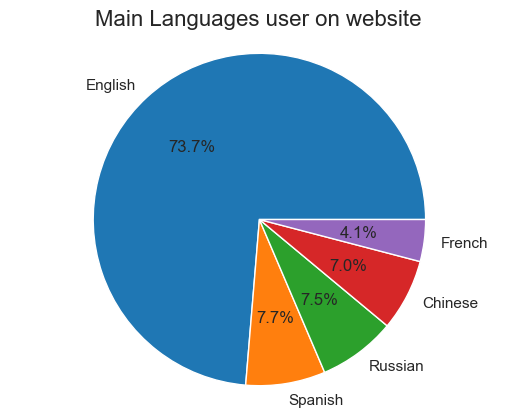

In [109]:
# pie chart
plt.pie(lang,labels=lang.index,autopct='%1.1f%%', colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
,)
plt.title("Main Languages user on website",fontsize=16)
plt.axis('equal') 

# MEMBERSHIP ANALYSIS:

Premium membership, boasting the highest sales in e-commerce analysis, offers exclusive deals and benefits to subscribers. This includes access to special discounts, early access to sales, and personalized recommendations, incentivizing greater spending and loyalty. Such perks cater to consumer preferences for value-added services, driving premium membership's dominance in sales.

In [27]:
# types of membership and what membership accesed the website the most:

Ecom["membership"].value_counts()

Premium          107345
Normal            49607
Not Logged In     15886
Name: membership, dtype: int64

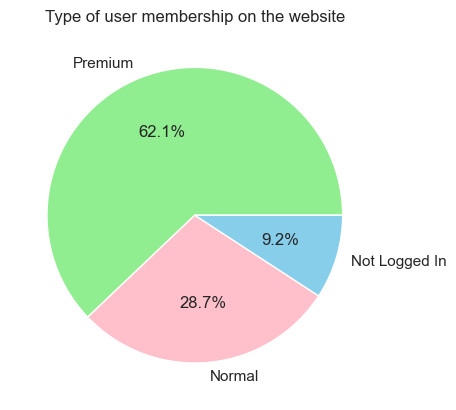

In [95]:
a = Ecom["membership"].value_counts()
plt.pie(a , labels=a.index , autopct='%1.1f%%' ,  colors=['lightgreen', 'pink', 'skyblue'])
plt.title("Type of user membership on the website")
plt.show()

#the pie chart shows different user membership percentages:

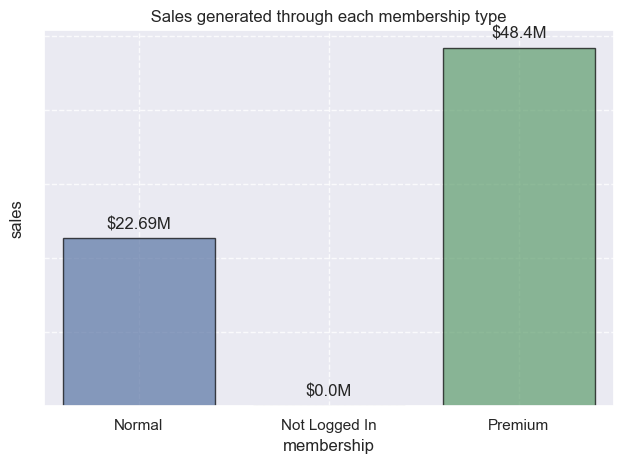

In [110]:
# Sales genrated through each membership type:

sns.set_theme()
ax = sns.barplot(x="membership", y="sales", data=Ecom.groupby("membership").sum().reset_index(),edgecolor='black',alpha=0.7)

ax.set_yticklabels([])
plt.title(" Sales generated through each membership type ")

for p in ax.patches:
    rounded_height = round(p.get_height() / 1_000_000, 2)
    ax.annotate(f'${rounded_height}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.grid(True, linestyle='--', alpha=0.8)    
plt.tight_layout()
plt.show()

The above bar chart shows that:
1) normal membership produced sales of 22.69M

2) Premium membership produced sales of 48.4M

3) Not logged in membership produced sales of 0.

In [30]:
# This proves that not logged create 0 SALES:
b = Ecom[Ecom["membership"]=="Not Logged In"]
b['sales'].sum()


0.0

In [31]:
c = Ecom[Ecom["membership"]=="Premium"]
c['sales'].sum()


48401436.169999994

# Countrywise Analysis:

In [32]:
Ecom["country"].unique()

array(['CA', 'AR', 'PL', 'IN', 'KR', 'CN', 'AT', 'US', 'SE', 'CH', 'NO',
       'JP', 'GB', 'MX', 'IT', 'RU', 'DE', 'AU', 'FI', 'PR', 'DK', 'CO',
       'AE', 'IE', 'PE', 'ZA', 'FR'], dtype=object)

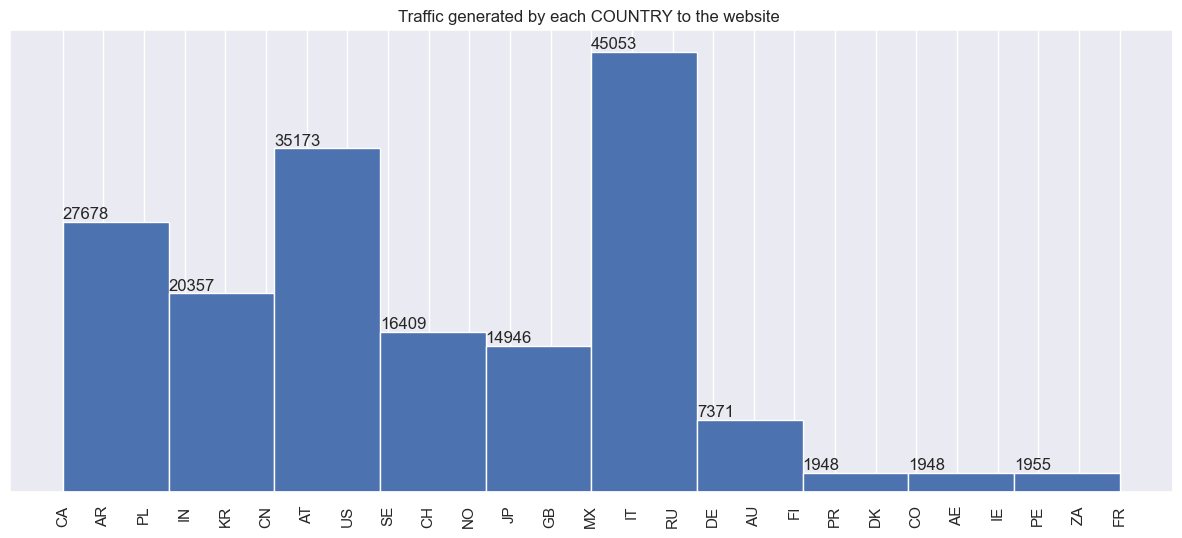

In [117]:
a= Ecom["country"]

plt.figure(figsize=(15, 6))
ax =plt.hist(a)
plt.title("Countries accessing the website", fontsize=18)
plt.xticks(rotation = 90)
plt.yticks([])

plt.title("Traffic generated by each COUNTRY to the website ")
counts = ax[0]
for i, count in enumerate(counts):
    plt.text(ax[1][i], count , str(int(count)), ha='left', va='bottom')



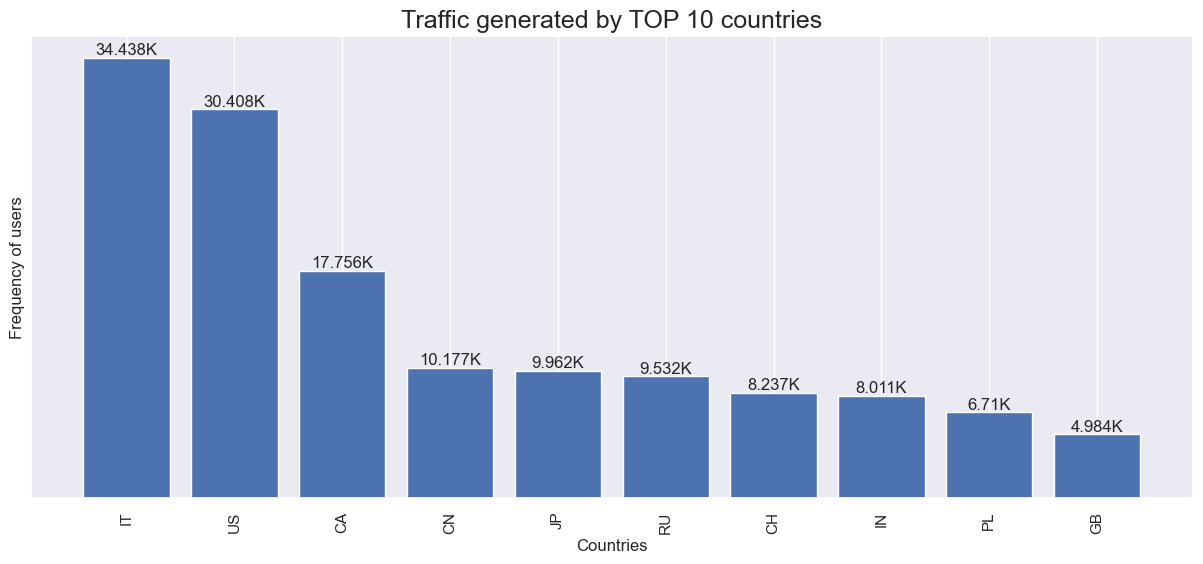

In [116]:

country_counts = Ecom["country"].value_counts()

# Select top 10 countries
top_10_countries = country_counts.head(10)


plt.figure(figsize=(15, 6))
ax = plt.bar(top_10_countries.index, top_10_countries.values)
plt.title("Traffic generated by TOP 10 countries", fontsize=18)
plt.xticks(rotation=90)
plt.yticks([])
plt.ylabel("Frequency of users")
plt.xlabel("Countries")


for i, count in enumerate(top_10_countries.values):
    plt.text(i, count, str((count/1000))+'K', ha='center', va='bottom')

plt.show()


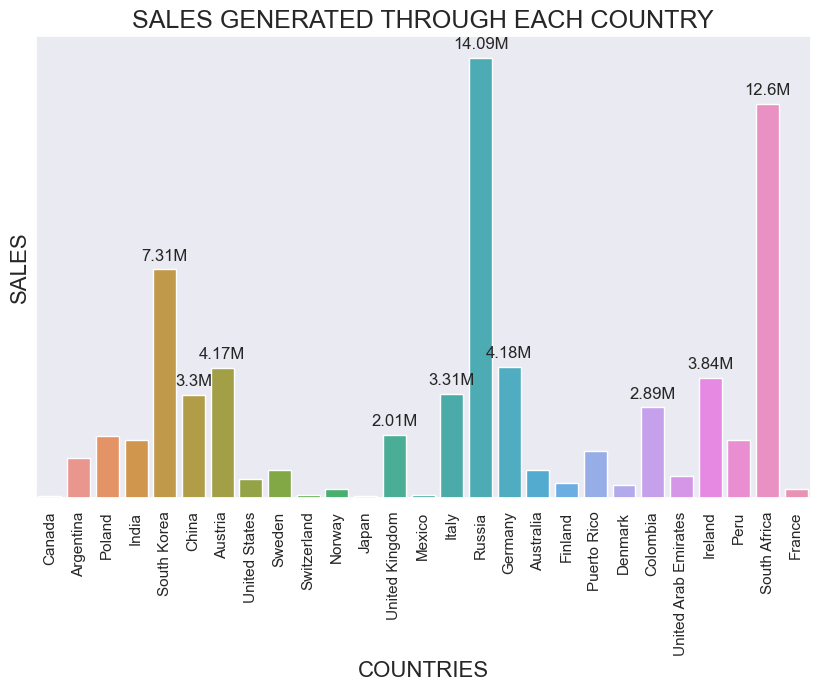

In [118]:
#Country that produced the most sales:


sns.set_theme()
plt.figure(figsize=(10, 6))

ax = sns.barplot(x="country", y="sales", data=Ecom.groupby("country").sum().reset_index(), )
plt.xticks(rotation = 90)
plt.yticks()

ax.ticklabel_format(axis='y', style='plain')

custom_x_ticks = [
    'Canada', 'Argentina', 'Poland', 'India', 'South Korea', 'China', 'Austria', 'United States', 'Sweden', 'Switzerland',
    'Norway', 'Japan', 'United Kingdom', 'Mexico', 'Italy', 'Russia', 'Germany', 'Australia', 'Finland', 'Puerto Rico',
    'Denmark', 'Colombia', 'United Arab Emirates', 'Ireland', 'Peru', 'South Africa', 'France']  

plt.xticks(range(len(custom_x_ticks)), custom_x_ticks)


for p in ax.patches:
    
        rounded_height = round(p.get_height() / 1_000_000, 2)
        if rounded_height > 2:
            ax.annotate(f'{rounded_height}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("SALES GENERATED THROUGH EACH COUNTRY", fontsize=18)
plt.xlabel("COUNTRIES",fontsize = 16)
plt.ylabel("SALES",fontsize = 16)
plt.yticks([])
    
plt.show()    


# RUSSIA PRODUCED THE LARGEST SALES

# GENDER ANALYSIS:

In [35]:
#Percentage of gender using the website:
Ecom["gender"].value_counts()

#no.of males , femals and unknown


Female     93903
Male       63049
Unknown    15886
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x1c19b0a0370>,
 [Text(-0.14917535940755092, 1.0898379293021638, 'Female'),
  Text(-0.16733855233032457, -1.087197226313603, 'Male'),
  Text(1.0544600158560127, -0.31323166340735376, 'Unknown')],
 [Text(-0.08136837785866412, 0.5944570523466347, '54.3%'),
  Text(-0.09127557399835885, -0.5930166688983288, '36.5%'),
  Text(0.5751600086487341, -0.1708536345858293, '9.2%')])

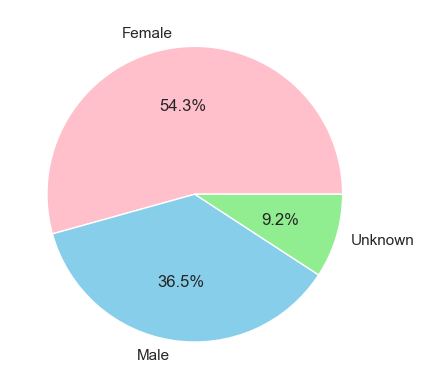

In [36]:
g = Ecom["gender"].value_counts()
plt.pie(g,labels=g.index, autopct="%1.1f%%", colors=["pink","skyblue","lightgreen"])

#The below pie chart shows there are 54.3% female ,36.5% male and 9.2 unknown gender accessing the website:

# UDERSTANDING:

In this data set we can further explore it to find queries and details of our own using different methods and functions.

for example:

1)  We can find about what gender from the USA created the moost sales:

2)  We can find about how many users of a particular were male.

3)  We can find about a particular platform and explore it sales and user info.


ETC

# CONCLUSION:


In conclusion, the e-commerce website analysis reveals several key insights. Cash transactions lead in sales, reflecting consumer preference for traditional payment methods. The Android app and Chrome emerge as top-performing platforms, indicating a preference for mobile and desktop browsing. Additionally, premium membership drives the highest sales, showcasing the effectiveness of exclusive deals and personalized benefits in fostering consumer loyalty and engagement. These findings underscore the importance of catering to diverse consumer preferences and offering tailored experiences to maximize sales and customer satisfaction in the competitive e-commerce landscape.